In [46]:
import pandas as pd

this is the main holdings file
1. Read in the file
2. Get unique tickers, investors and caledar dates
3. select the first calendar date.


In [67]:
sf3 = pd.read_csv('data/SHARADAR_holdings.csv')
sf3 = sf3.dropna()
ticker_list=sf3['ticker'].unique()
ticker_list.sort()
investor_list=sf3['investorname'].unique()
calendar_list=sf3['calendardate'].unique()
investor_list.sort()

q_index: which quarter

In [69]:
calendar_list.sort()
quarter_num=1
#choose only the earliest date
#get a smaller subset for the earliest date
sf3 = sf3[sf3['calendardate'] == calendar_list[quarter_num]]


file=data/data_2q/sf_holdings_1000i_1000t.csv


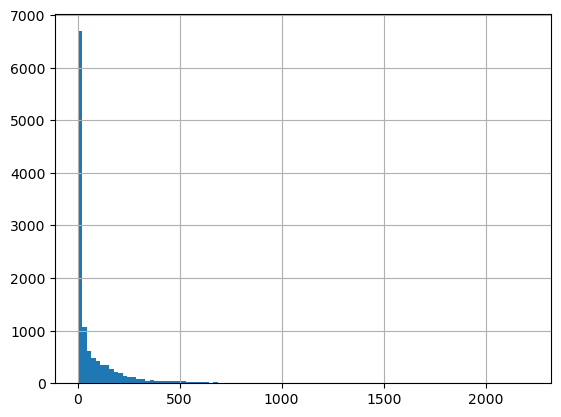

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#create a histogram of number of holdings per investor
investor_list=sf3['investorname'].unique()
investor_list.sort()
investor_list
investor_count = sf3.groupby('investorname').count()
investor_count = investor_count.sort_values(by=['ticker'], ascending=False)
investor_count = investor_count.reset_index()
investor_count = investor_count[['investorname', 'ticker']]
investor_count = investor_count.rename(columns={"ticker": "count"})
#investor_count
#investor_count['count'].hist(bins=100)
#plt.show()
investor_count
len(ticker_list)
investor_count[0:100]
#now do the same with tickers
ticker_count = sf3.groupby('ticker').count()
ticker_count = ticker_count.sort_values(by=['investorname'], ascending=False)
ticker_count = ticker_count.reset_index()
ticker_count = ticker_count[['ticker', 'investorname']]
ticker_count = ticker_count.rename(columns={"investorname": "count"})
ticker_count
ticker_count['count'].hist(bins=100)
investor_count[0:1000]
ticker_count[0:2500]

num_investors = 1000
num_tickers = 1000
investor_list = investor_count['investorname'][0:num_investors]
ticker_list = ticker_count['ticker'][0:num_tickers]
sf_small=sf3
sf_small = sf_small[sf_small['investorname'].isin(investor_list)]
sf_small = sf_small[sf_small['ticker'].isin(ticker_list)]

sf_small.shape[0]/len(investor_list)/len(ticker_list)

investor_count[0:1000]
filename=f'data/data_{quarter_num+1}q/sf_holdings_{num_investors}i_{num_tickers}t.csv'
print(f'file={filename}')
sf_small.to_csv(filename, index=False)

In [50]:
sf_small.shape[0]

392909